># **HistGradientBoosting Regressor  – Model Training and Evaluation**
>
>
>The dataframe used in this notebook originates from the preprocessing steps 
>performed in the `"1_4b-preprocessing-feature-engineering-and-preprocessing-for-predictive-models.ipynb"` notebook.
>The final refinement of selected variables is conducted here to meet the 
>specific requirements of the models being developed, based on insights from 
>the aforementioned notebook.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [ ]:
# Loading the Dataset and Handling Missing Values of Y
df = pd.read_csv("model_prediction_data.csv", index_col = 0, sep = ",")
df = df.dropna(subset=["electric_energy_consumption"])

In [6]:
df.head()

,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,fuel_consumption,specific_co2_emissions,innovative_technologies,fuel_type,fuel_mode,electric_energy_consumption
ID,,,,,,,,,,,,,
56003309,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003313,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003314,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003351,1635.0,1749.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,petrol,M,0.0
56003352,1635.0,1749.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,petrol,M,0.0


In [ ]:
# Separate features and target
x = df.drop(columns=["electric_energy_consumption"])
y = df["electric_energy_consumption"]

In [ ]:
# Transform categorical variables
categorical_features = ["fuel_mode", "fuel_type", "innovative_technologies"]
for col in categorical_features:
    x[col] = x[col].astype("category")

In [ ]:
# Splitting Data into Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
# Save the datasets (train-test split)
joblib.dump((x_train, x_test, y_train, y_test), "train_test_split_histgradboostreg.pkl")

print("Train-test split saved successfully!")

Train-test split saved successfully!


In [ ]:
# HGBR model setup
model = HistGradientBoostingRegressor(
    max_iter = 500,
    early_stopping = True,
    learning_rate = 0.05,
    max_leaf_nodes = 63,
    validation_fraction = 0.2,
    random_state = 42
)

In [ ]:
# Training
model.fit(x_train, y_train)

HistGradientBoostingRegressor(early_stopping=True, learning_rate=0.05,
                              max_iter=500, max_leaf_nodes=63, random_state=42,
                              validation_fraction=0.2)

=== Test Set ===
MAE: 0.2593
MSE: 11.2171
RMSE: 3.3492
R² Score: 0.9961
Mean of y_test: 16.2956
RMSE as % of mean: 20.55%

=== Train Set ===
MAE: 0.2570
MSE: 11.0671
RMSE: 3.3267
R² Score: 0.9961
Mean of y_train: 16.2857
RMSE as % of mean: 20.43%

=== Cross-Validation on Training Set ===
Cross-Validation R² Scores: [0.99597062 0.99598308 0.9957996 ]
Average CV R²: 0.9959177668834963
R² Variance: 7.008026015444352e-09


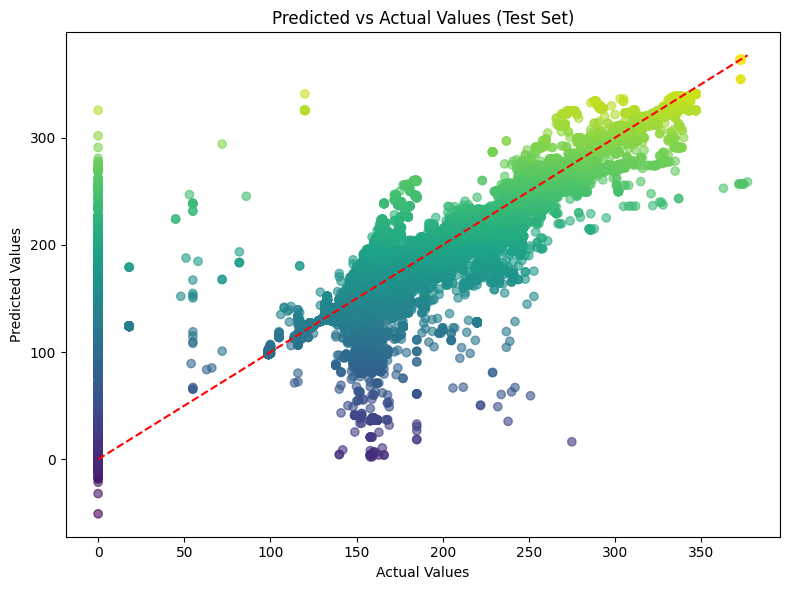

In [ ]:
# Predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Test set metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Train set metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Means for contextual RMSE
mean_y_test = y_test.mean()
mean_y_train = y_train.mean()

# Print test metrics
print("=== Test Set ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")
print(f"Mean of y_test: {mean_y_test:.4f}")
print(f"RMSE as % of mean: {100 * rmse_test / mean_y_test:.2f}%")

# Print train metrics
print("\n=== Train Set ===")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean of y_train: {mean_y_train:.4f}")
print(f"RMSE as % of mean: {100 * rmse_train / mean_y_train:.2f}%")

# Cross-validation R² (on training data)
cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring="r2")
print("\n=== Cross-Validation on Training Set ===")
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))
print("R² Variance:", np.var(cv_scores))

# Plot predicted vs actual (test set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c=y_pred_test, cmap="viridis", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")
plt.title("Predicted vs Actual Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()
plt.show()


### Analysis of the Results

**Train Set Evaluation:**  
- **R² Score:** 0.9961  
- **Mean Absolute Error:** 0.2570  
- **Mean Squared Error:** 11.0671  
- **Root Mean Squared Error:** 3.3267  

**Test Set Evaluation:**  
- **R² Score:** 0.9961  
- **Mean Absolute Error:** 0.2593  
- **Mean Squared Error:** 11.2171  
- **Root Mean Squared Error:** 3.3492  

**Additional Insight:**  
- **Mean Electric Energy Consumption (excluding zeros):** 182.3966  

The evaluation metrics indicate **excellent model performance**, with R² scores above 0.996 on both training and test sets. The low MAE and RMSE values confirm the high accuracy of the predictions, and the near-identical results across the two sets demonstrate **very strong generalization** and absence of overfitting. These results reaffirm the capability of the HistGradientBoostingRegressor to model complex patterns in the data efficiently.

### RMSE Analysis in Context of Electric Energy Consumption Scale

The average electric energy consumption (excluding zeros) is approximately 182.4. With a test set RMSE of about 3.35, the model’s predictions deviate on average by roughly **1.84%** relative to the mean consumption (3.35 / 182.4 ≈ 0.0184). This indicates a **very low relative prediction error**, confirming the model’s high precision across the test set.

**Overall, although the low RMSE suggests robust model performance, further analysis is warranted to confirm that the error is consistently low across all observations.**

### Comparing RMSE and MAE in the Context of the Target Scale

Given the average electric energy consumption of approximately 182.4, we observe the following:

- **RMSE (≈ 3.35):**  
  This value corresponds to approximately **1.84%** of the target’s scale, reflecting the impact of squared errors and emphasizing any larger deviations.

- **MAE (≈ 0.26):**  
  The Mean Absolute Error corresponds to roughly **0.14%** of the mean target value, indicating that, on average, the predictions are **extremely close** to the actual values.

**Interpretation:**  
The moderate discrepancy between RMSE and MAE indicates that, although most predictions are highly accurate, a **small number of higher-error cases** contribute more substantially to the RMSE. This is consistent with the behavior expected in high-performing models on slightly heterogeneous data.

**Interpretation of the Difference and its possible meaning:**  
- The fact that RMSE is notably higher than MAE suggests the presence of **a few outlier cases** with larger errors.  
- However, the small absolute difference (≈ 3.35 vs. 0.26) and the low overall error percentages reinforce the model"s **reliability and robustness**.

### HistGradientBoosting-Specific Considerations

The HistGradientBoostingRegressor delivered one of the best performances among the models tested so far. It achieved high accuracy with minimal preprocessing, producing nearly identical results on both training and test sets. This consistency reinforces the model’s ability to generalize well, even without dedicated tuning or feature engineering.

Its low prediction error — with an RMSE of approximately 3.35 and an MAE of just 0.26 — confirms that the model can produce highly precise estimates for electric energy consumption. The relative error of 1.84% compared to the mean target value further highlights the strength of the predictions.

Among all models evaluated to this point, HistGradientBoosting has demonstrated **one of the most favorable balances between predictive power and stability**, justifying its use as a strong benchmark before advancing to more complex deep learning approaches.
